<a href="https://colab.research.google.com/github/ngzhiwei517/Machine_Learning_Self-Learn/blob/main/Pandas_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# 🔗 merge
merge() works like SQL JOIN.

It automatically matches rows by the column(s) you specify using on=, left_on=, right_on=.

If you don’t specify, it tries to merge on common column names.
```



```
# concat() does NOT match by column values.

It only stacks DataFrames:
```



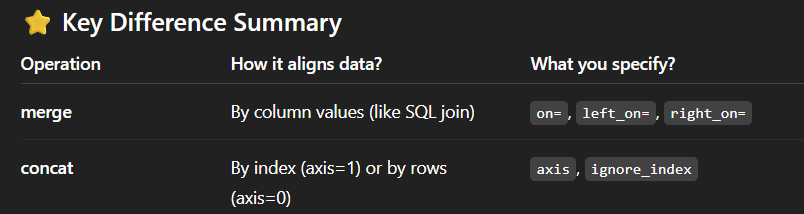

# **Tutorial 6. Handle Missing Data: replace function**

In [30]:
import pandas as pd
import numpy as np
df = pd.read_csv("/content/weather_data (1).csv")
df


,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,-99999,7,Sunny
2,1/3/2017,28,-99999,Snow
3,1/4/2017,-99999,7,No Event
4,1/5/2017,32,-88888,Rain
5,1/6/2017,31,2,Sunny
6,1/6/2017,34,5,No Event


In [9]:
new_df=df.replace(-99999,value=np.nan)
new_df

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/2/2017,NaN,7.0,Sunny
2,1/3/2017,28.0,NaN,Snow
3,1/4/2017,NaN,7.0,0
4,1/5/2017,32.0,-88888.0,Rain
5,1/6/2017,31.0,2.0,Sunny
6,1/6/2017,34.0,5.0,0


### Replace two different value with NAN

In [19]:
new_df=df.replace([-99999,-88888],'NAN')
new_df

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,NAN,7,Sunny
2,1/3/2017,28,NAN,Snow
3,1/4/2017,NAN,7,0
4,1/5/2017,32,NAN,Rain
5,1/6/2017,31,2,Sunny
6,1/6/2017,34,5,0


### Replace value based on specific column

In [23]:
new_df=df.replace({
    'temperature':-99999,
    'windspeed':[-99999,-88888],
    'event':'0'
},'NAN')

In [24]:
new_df

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,NAN,7,Sunny
2,1/3/2017,28,NAN,Snow
3,1/4/2017,NAN,7,NAN
4,1/5/2017,32,NAN,Rain
5,1/6/2017,31,2,Sunny
6,1/6/2017,34,5,NAN


In [26]:
df

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,-99999,7,Sunny
2,1/3/2017,28,-99999,Snow
3,1/4/2017,-99999,7,No Event
4,1/5/2017,32,-88888,Rain
5,1/6/2017,31,2,Sunny
6,1/6/2017,34,5,No Event


In [31]:
new_df=df.replace({
    -99999:'NAN',
    'No Event':'Sunny'
})
new_df

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,NAN,7,Sunny
2,1/3/2017,28,NAN,Snow
3,1/4/2017,NAN,7,Sunny
4,1/5/2017,32,-88888,Rain
5,1/6/2017,31,2,Sunny
6,1/6/2017,34,5,Sunny


### Practice

Replace all -999 values with NaN in the dataset.

In [37]:
import pandas as pd
import numpy as np

df = pd.DataFrame({
    'Temperature': [25, -999, 30, 28],
    'Humidity': [60, 55, -999, 65],
    'Pressure': [1013, 1015, 1014, -999]
})
df

,Temperature,Humidity,Pressure
0,25,60,1013
1,-999,55,1015
2,30,-999,1014
3,28,65,-999


In [36]:
new_df=df.replace(-999,np.nan)
new_df

,Temperature,Humidity,Pressure
0,25.0,60.0,1013.0
1,NaN,55.0,1015.0
2,30.0,NaN,1014.0
3,28.0,65.0,NaN


Replace multiple error codes (-999 and -888) with NaN in a single operation.

In [40]:
import pandas as pd
import numpy as np

df = pd.DataFrame({
    'Reading1': [100, -999, 105, -888, 110],
    'Reading2': [200, 205, -888, 210, -999]
})
new_df=df.replace([-999,-888],np.nan)
new_df

,Reading1,Reading2
0,100.0,200.0
1,NaN,205.0
2,105.0,NaN
3,NaN,210.0
4,110.0,NaN


Replace specific values per column: Temperature → replace -999 with NaN, Status → replace 'unknown' with NaN.

In [42]:
import pandas as pd
import numpy as np

df = pd.DataFrame({
    'Temperature': [25, -999, 30],
    'Status': ['ok', 'unknown', 'ok']
})
df

,Temperature,Status
0,25,ok
1,-999,unknown
2,30,ok


In [44]:
new_df=df.replace({
    -999:np.nan,
    'unknown':np.nan
})
new_df

,Temperature,Status
0,25.0,ok
1,NaN,NaN
2,30.0,ok


Use a mapping dictionary to replace multiple values with different replacements.

In [45]:
import pandas as pd
import numpy as np

df = pd.DataFrame({
    'Temperature': [25, -999, 30, -888],
    'Note': ['error', 'valid', 'valid', 'error']
})

# Replace -999 with NaN, -888 with 0, and 'error' with 'invalid'
df

,Temperature,Note
0,25,error
1,-999,valid
2,30,valid
3,-888,error


In [46]:
new_df=df.replace({
    -999:np.nan,
    -888:0,
    'error':'invalid'
})
new_df

,Temperature,Note
0,25.0,invalid
1,NaN,valid
2,30.0,valid
3,0.0,invalid




---



---



---



### Regex Expression

In [50]:
import pandas as pd
import numpy as np
df = pd.read_csv("/content/weather_data (1).csv")
df


,day,temperature,windspeed,event
0,1/1/2017,32 F,6 mph,Rain
1,1/2/2017,-99999,7 mph,Sunny
2,1/3/2017,28,-99999,Snow
3,1/4/2017,-99999,7,No Event
4,1/5/2017,32 C,-88888,Rain
5,1/6/2017,31,2,Sunny
6,1/6/2017,34,5,No Event


In [49]:
new_df=df.replace('[A-Za-z]','',regex=True)
new_df

,day,temperature,windspeed,event
0,1/1/2017,32,6,
1,1/2/2017,-99999,7,
2,1/3/2017,28,-99999,
3,1/4/2017,-99999,7,
4,1/5/2017,32,-88888,
5,1/6/2017,31,2,
6,1/6/2017,34,5,


In [53]:
new_df=df.replace({
    'temperature':'[A-Za-z]',
    'windspeed':'[A-Za-z]'
},'',regex=True)
new_df

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,-99999,7,Sunny
2,1/3/2017,28,-99999,Snow
3,1/4/2017,-99999,7,No Event
4,1/5/2017,32,-88888,Rain
5,1/6/2017,31,2,Sunny
6,1/6/2017,34,5,No Event


Replacing list with another list

In [54]:

df = pd.DataFrame({
    'score': ['exceptional','average', 'good', 'poor', 'average', 'exceptional'],
    'student': ['rob', 'maya', 'parthiv', 'tom', 'julian', 'erica']
})
df

,score,student
0,exceptional,rob
1,average,maya
2,good,parthiv
3,poor,tom
4,average,julian
5,exceptional,erica


In [55]:
new_df=df.replace(['poor', 'average', 'good', 'exceptional'],[1,2,3,4])
new_df

/tmp/ipython-input-2453660814.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_df=df.replace(['poor', 'average', 'good', 'exceptional'],[1,2,3,4])


,score,student
0,4,rob
1,2,maya
2,3,parthiv
3,1,tom
4,2,julian
5,4,erica


# **Pandas Tutorial 7. Group By (Split Apply Combine)**

In [56]:

import pandas as pd
df = pd.read_csv("weather_by_cities.csv")
df

,day,city,temperature,windspeed,event
0,1/1/2017,new york,32,6,Rain
1,1/2/2017,new york,36,7,Sunny
2,1/3/2017,new york,28,12,Snow
3,1/4/2017,new york,33,7,Sunny
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog
6,1/3/2017,mumbai,87,15,Fog
7,1/4/2017,mumbai,92,5,Rain
8,1/1/2017,paris,45,20,Sunny
9,1/2/2017,paris,50,13,Cloudy


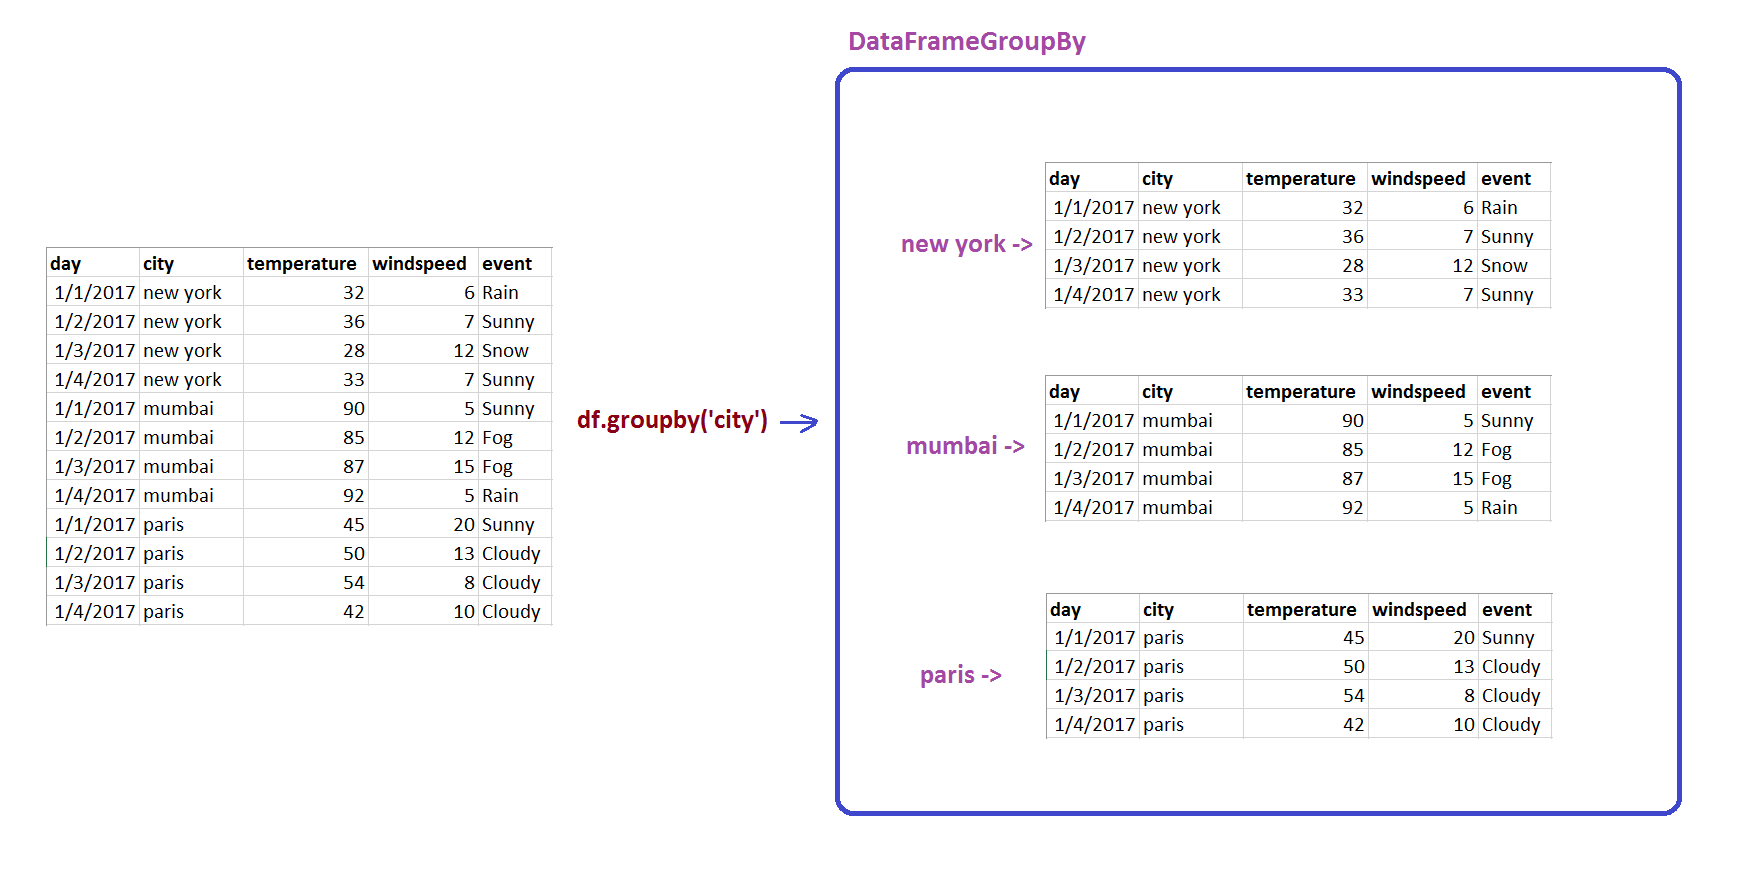

In [61]:
g=df.groupby('city')
for city,city_df in g:
  print(city)
  print(city_df)

mumbai
        day    city  temperature  windspeed  event
4  1/1/2017  mumbai           90          5  Sunny
5  1/2/2017  mumbai           85         12    Fog
6  1/3/2017  mumbai           87         15    Fog
7  1/4/2017  mumbai           92          5   Rain
new york
        day      city  temperature  windspeed  event
0  1/1/2017  new york           32          6   Rain
1  1/2/2017  new york           36          7  Sunny
2  1/3/2017  new york           28         12   Snow
3  1/4/2017  new york           33          7  Sunny
paris
         day   city  temperature  windspeed   event
8   1/1/2017  paris           45         20   Sunny
9   1/2/2017  paris           50         13  Cloudy
10  1/3/2017  paris           54          8  Cloudy
11  1/4/2017  paris           42         10  Cloudy


## Get specific data frame

In [62]:
g.get_group('paris')

,day,city,temperature,windspeed,event
8,1/1/2017,paris,45,20,Sunny
9,1/2/2017,paris,50,13,Cloudy
10,1/3/2017,paris,54,8,Cloudy
11,1/4/2017,paris,42,10,Cloudy


What was the maximum temperature in each of these 3 cities?

In [60]:
df.groupby('city')['temperature'].max()

,temperature
city,
mumbai,92
new york,36
paris,54


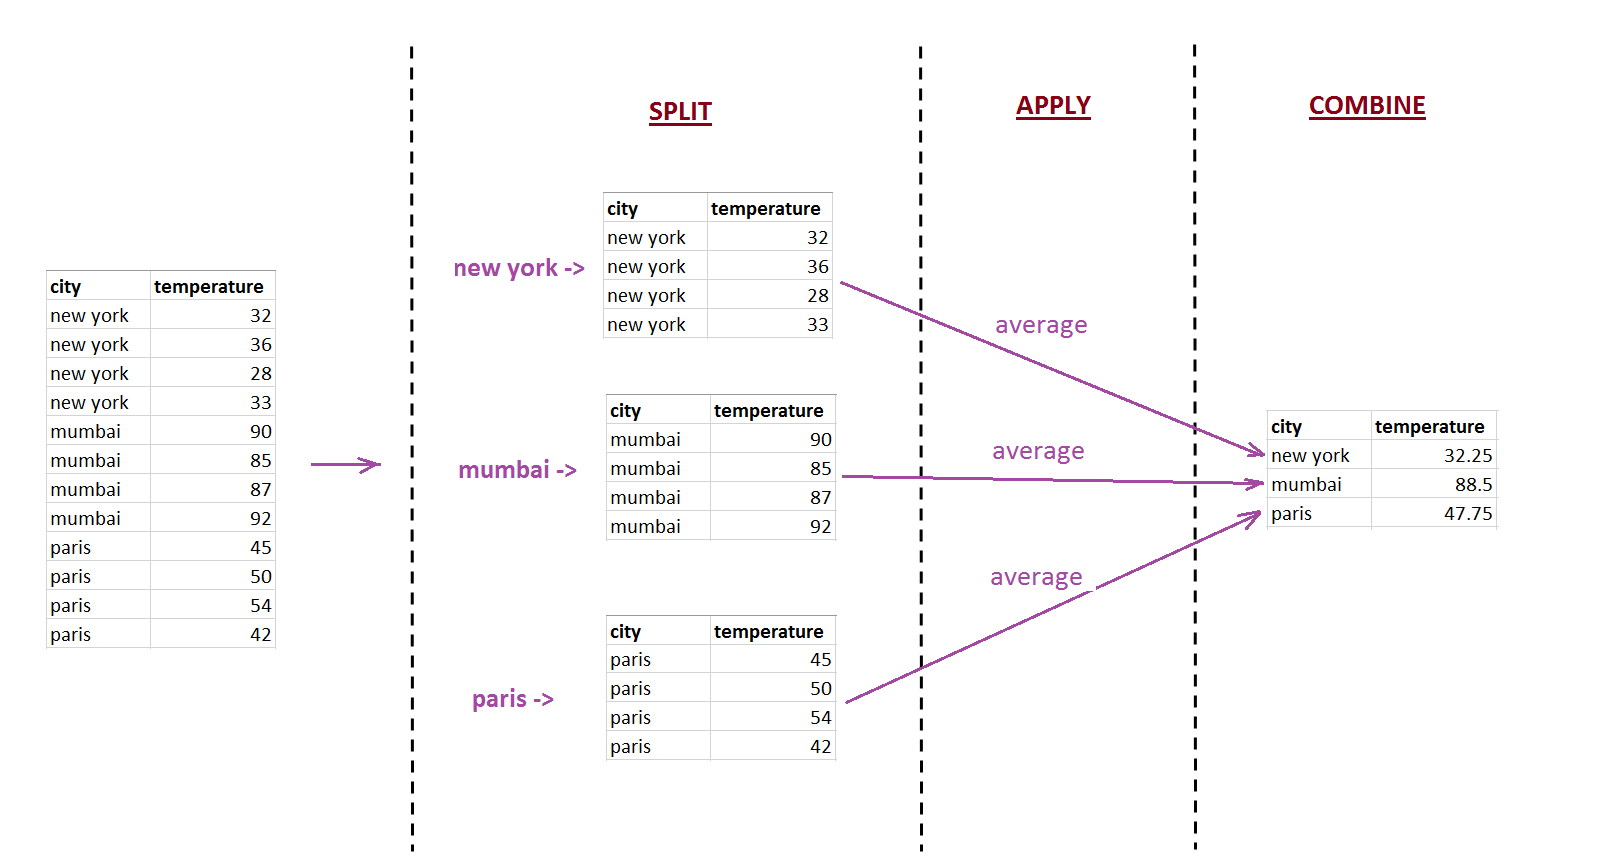

 What was the average windspeed in each of these 3 cities?


In [63]:
df.groupby('city')['windspeed'].mean()

,windspeed
city,
mumbai,9.25
new york,8.00
paris,12.75


# Tutorial 8. Pandas Concatenate

In [72]:
import pandas as pd

india_weather = pd.DataFrame({
    "city": ["mumbai","delhi","banglore"],
    "temperature": [32,45,30],
    "humidity": [80, 60, 78]
})
india_weather

,city,temperature,humidity
0,mumbai,32,80
1,delhi,45,60
2,banglore,30,78


In [73]:
us_weather = pd.DataFrame({
    "city": ["new york","chicago","orlando"],
    "temperature": [21,14,35],
    "humidity": [68, 65, 75]
})
us_weather


,city,temperature,humidity
0,new york,21,68
1,chicago,14,65
2,orlando,35,75


In [74]:
df=pd.concat([india_weather,us_weather])
df

,city,temperature,humidity
0,mumbai,32,80
1,delhi,45,60
2,banglore,30,78
0,new york,21,68
1,chicago,14,65
2,orlando,35,75


In [75]:
df=pd.concat([india_weather,us_weather],ignore_index=True)
df

,city,temperature,humidity
0,mumbai,32,80
1,delhi,45,60
2,banglore,30,78
3,new york,21,68
4,chicago,14,65
5,orlando,35,75


In [78]:
df=pd.concat([india_weather,us_weather],keys=['India','US'])
df

city  temperature  humidity
India 0    mumbai           32        80
      1     delhi           45        60
      2  banglore           30        78
US    0  new york           21        68
      1   chicago           14        65
      2   orlando           35        75

In [82]:
df.iloc[2]

,India
,2
city,banglore
temperature,30
humidity,78


In [84]:
df.loc['US']

,city,temperature,humidity
0,new york,21,68
1,chicago,14,65
2,orlando,35,75


In [85]:
temperature_df = pd.DataFrame({
    "city": ["mumbai","delhi","banglore"],
    "temperature": [32,45,30],
}, index=[0,1,2])
temperature_df

,city,temperature
0,mumbai,32
1,delhi,45
2,banglore,30


In [86]:

windspeed_df = pd.DataFrame({
    "city": ["delhi","mumbai"],
    "windspeed": [7,12],
}, index=[1,0])
windspeed_df

,city,windspeed
1,delhi,7
0,mumbai,12


In [88]:
pd.concat([temperature_df,windspeed_df]) #by default axis=0 it means that it will append second data frame as row

,city,temperature,windspeed
0,mumbai,32.0,NaN
1,delhi,45.0,NaN
2,banglore,30.0,NaN
1,delhi,NaN,7.0
0,mumbai,NaN,12.0


In [97]:
pd.concat([temperature_df,windspeed_df],axis=1)

,city,temperature,city,windspeed
0,mumbai,32,mumbai,12.0
1,delhi,45,delhi,7.0
2,banglore,30,NaN,NaN


### When the order is different

In [100]:
temperature_df=pd.DataFrame({
    'city':['mumbai','delhi','banglore'],
    'temperature':[32,45,40]
},index=[0,1,2])

In [99]:
windspeed_df=pd.DataFrame({
    'city':['delhi','mumbai'],
    'temperature':[7,12]
},index=[1,0])

In [103]:
pd.concat([temperature_df,windspeed_df],axis=1)

,city,temperature,city,temperature
0,mumbai,32,mumbai,12.0
1,delhi,45,delhi,7.0
2,banglore,40,NaN,NaN


In [109]:
s=pd.Series(['Humid','Dry','Rain'],name='event')
s

,event
0,Humid
1,Dry
2,Rain


In [112]:
new_concat=pd.concat([temperature_df,s],axis=1)
new_concat

,city,temperature,event
0,mumbai,32,Humid
1,delhi,45,Dry
2,banglore,40,Rain




---



---



---

# Exercise
Scenario: You have quarterly sales data that needs to be combined into a single report.

In [89]:
q1_sales = pd.DataFrame({
    'product': ['Laptop', 'Mouse', 'Keyboard'],
    'sales': [50, 200, 150],
    'revenue': [50000, 4000, 7500]
})
q1_sales

,product,sales,revenue
0,Laptop,50,50000
1,Mouse,200,4000
2,Keyboard,150,7500


In [90]:
# Create Q2 Sales DataFrame
q2_sales = pd.DataFrame({
    'product': ['Laptop', 'Mouse', 'Keyboard'],
    'sales': [65, 220, 180],
    'revenue': [65000, 4400, 9000]
})

In [92]:
new_df=pd.concat([q1_sales,q2_sales],ignore_index=True)
new_df

,product,sales,revenue
0,Laptop,50,50000
1,Mouse,200,4000
2,Keyboard,150,7500
3,Laptop,65,65000
4,Mouse,220,4400
5,Keyboard,180,9000




---

Regional sales managers need to combine data while maintaining regional identification.



In [93]:
# North Region DataFrame
north_region = pd.DataFrame({
    'store': ['Store A', 'Store B', 'Store C'],
    'sales': [15000, 18000, 12000]
})

# South Region DataFrame
south_region = pd.DataFrame({
    'store': ['Store D', 'Store E'],
    'sales': [20000, 16000]
})

,store,sales
0,Store A,15000
1,Store B,18000
2,Store C,12000


In [96]:
new_df=pd.concat([north_region,south_region],keys=['North','South'])
new_df.loc['South']

,store,sales
0,Store D,20000
1,Store E,16000


HR needs to combine employee names with their salary information.

In [106]:
employee_names = pd.DataFrame({
    'emp_id': [101, 102, 103],
    'name': ['Alice', 'Bob', 'Charlie']
}, index=[0, 1, 2])

# Employee Salary DataFrame
employee_salary = pd.DataFrame({
    'emp_id': [101, 102, 103],
    'salary': [70000, 80000, 75000]
}, index=[0, 1, 2])

employee_names

,emp_id,name
0,101,Alice
1,102,Bob
2,103,Charlie


In [107]:
employee_salary

,emp_id,salary
0,101,70000
1,102,80000
2,103,75000


In [108]:
new_df=pd.concat([employee_names,employee_salary],axis=1)
new_df

,emp_id,name,emp_id,salary
0,101,Alice,101,70000
1,102,Bob,102,80000
2,103,Charlie,103,75000


 Add a new column of weather events to existing temperature data.

In [115]:
temperature_df = pd.DataFrame({
    'city': ['Mumbai', 'Delhi', 'Bangalore'],
    'temperature': [32, 45, 30]
}, index=[0, 1, 2])

In [114]:
event = pd.Series(['Humid', 'Dry', 'Rain'], name='event')


In [116]:
s=pd.concat([temperature_df,event],axis=1)
s

,city,temperature,event
0,Mumbai,32,Humid
1,Delhi,45,Dry
2,Bangalore,30,Rain


EXERCISE 5: Handling Mismatched Indices

In [120]:
# Product Prices DataFrame
product_prices = pd.DataFrame({
    'product': ['Apple', 'Banana', 'Orange'],
    'price': [1.2, 0.5, 0.8]
}, index=[0, 1, 2])

# Product Stock DataFrame (different index!)
product_stock = pd.DataFrame({
    'product': ['Banana', 'Apple', 'Grape'],
    'stock': [150, 200, 100]
}, index=[1, 0, 3])

In [122]:
new_df=pd.concat([product_prices,product_stock],axis=1)
new_df

,product,price,product,stock
0,Apple,1.2,Apple,200.0
1,Banana,0.5,Banana,150.0
2,Orange,0.8,NaN,NaN
3,NaN,NaN,Grape,100.0


# Pandas Tutorial 9. Merge Dataframes

In [117]:

import pandas as pd
df1 = pd.DataFrame({
    "city": ["new york","chicago","orlando"],
    "temperature": [21,14,35],
})
df1

,city,temperature
0,new york,21
1,chicago,14
2,orlando,35


In [118]:

df2 = pd.DataFrame({
    "city": ["chicago","new york","orlando"],
    "humidity": [65,68,75],
})
df2

,city,humidity
0,chicago,65
1,new york,68
2,orlando,75


In [119]:
df3=pd.merge(df1,df2,on='city')
df3

,city,temperature,humidity
0,new york,21,68
1,chicago,14,65
2,orlando,35,75


## Inner Join

In [123]:

import pandas as pd
df1 = pd.DataFrame({
    "city": ["new york","chicago","orlando",'bath'],
    "temperature": [21,14,35,42],
})
df1

,city,temperature
0,new york,21
1,chicago,14
2,orlando,35
3,bath,42


In [124]:

df2 = pd.DataFrame({
    "city": ["chicago","new york","san franc"],
    "humidity": [65,68,70],
})
df2

,city,humidity
0,chicago,65
1,new york,68
2,san franc,70


In [125]:
s=pd.merge(df1,df2,on='city')
s

,city,temperature,humidity
0,new york,21,68
1,chicago,14,65


## Outer join

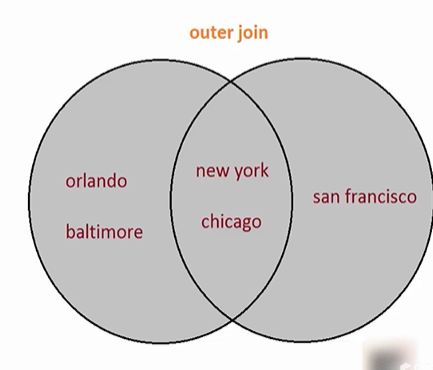

By default is inner join

with indicator we can know where the data comes from

In [130]:
df3=pd.merge(df1,df2,how='outer',indicator=True)
df3

,city,temperature,humidity,_merge
0,bath,42.0,NaN,left_only
1,chicago,14.0,65.0,both
2,new york,21.0,68.0,both
3,orlando,35.0,NaN,left_only
4,san franc,NaN,70.0,right_only


### Left Join

In [128]:
df3=pd.merge(df1,df2,how='left')
df3

,city,temperature,humidity
0,new york,21,68.0
1,chicago,14,65.0
2,orlando,35,NaN
3,bath,42,NaN


### Right join

In [129]:
df3=pd.merge(df1,df2,how='right')
df3

,city,temperature,humidity
0,chicago,14.0,65
1,new york,21.0,68
2,san franc,NaN,70


### Suffixes

In [131]:
df1 = pd.DataFrame({
    "city": ["new york","chicago","orlando", "baltimore"],
    "temperature": [21,14,35,38],
    "humidity": [65,68,71, 75]
})
df1


,city,temperature,humidity
0,new york,21,65
1,chicago,14,68
2,orlando,35,71
3,baltimore,38,75


In [132]:
df2 = pd.DataFrame({
    "city": ["chicago","new york","san diego"],
    "temperature": [21,14,35],
    "humidity": [65,68,71]
})
df2

,city,temperature,humidity
0,chicago,21,65
1,new york,14,68
2,san diego,35,71


In [133]:
df3=pd.merge(df1,df2,on='city')
df3

,city,temperature_x,humidity_x,temperature_y,humidity_y
0,new york,21,65,14,68
1,chicago,14,68,21,65


In [134]:
df3=pd.merge(df1,df2,on='city',suffixes=('First','Second'))
df3

,city,temperatureFirst,humidityFirst,temperatureSecond,humiditySecond
0,new york,21,65,14,68
1,chicago,14,68,21,65




---



---



---



# Exercise

In [135]:
import pandas as pd

df1 = pd.DataFrame({
    'city': ['New York', 'Chicago', 'Orlando'],
    'temperature': [21, 14, 35]
})

df2 = pd.DataFrame({
    'city': ['Chicago', 'New York', 'Orlando'],
    'humidity': [65, 68, 75]
})

In [136]:
df3=pd.merge(df1,df2,on='city')
df3

,city,temperature,humidity
0,New York,21,68
1,Chicago,14,65
2,Orlando,35,75


Perform an outer join to keep all cities from both DataFrames.

In [139]:
import pandas as pd

df1 = pd.DataFrame({
    'city': ['New York', 'Chicago', 'Orlando', 'Baltimore'],
    'temperature': [21, 14, 35, 38]
})

df2 = pd.DataFrame({
    'city': ['Chicago', 'New York', 'San Diego'],
    'humidity': [65, 68, 71]
})


In [140]:
pd.merge(df1,df2,how='outer')

,city,temperature,humidity
0,Baltimore,38.0,NaN
1,Chicago,14.0,65.0
2,New York,21.0,68.0
3,Orlando,35.0,NaN
4,San Diego,NaN,71.0


Perform a left join to keep all rows from the first DataFrame.

In [141]:
import pandas as pd

df1 = pd.DataFrame({
    'city': ['New York', 'Chicago', 'Orlando', 'Baltimore'],
    'temperature': [21, 14, 35, 38]
})

df2 = pd.DataFrame({
    'city': ['Chicago', 'New York', 'San Diego'],
    'humidity': [65, 68, 71]
})

In [143]:
df3=pd.merge(df1,df2,how='left')
df3

,city,temperature,humidity
0,New York,21,68.0
1,Chicago,14,65.0
2,Orlando,35,NaN
3,Baltimore,38,NaN


Use the indicator parameter to see which rows came from which DataFrame.

In [ ]:
import pandas as pd

df1 = pd.DataFrame({
    'city': ['New York', 'Chicago', 'Orlando', 'Baltimore'],
    'temperature': [21, 14, 35, 38]
})

df2 = pd.DataFrame({
    'city': ['Chicago', 'New York', 'San Diego'],
    'humidity': [65, 68, 71]
})

In [145]:
df_3=pd.merge(df1,df2,how='outer',indicator=True)
df_3

,city,temperature,humidity,_merge
0,Baltimore,38.0,NaN,left_only
1,Chicago,14.0,65.0,both
2,New York,21.0,68.0,both
3,Orlando,35.0,NaN,left_only
4,San Diego,NaN,71.0,right_only


Handle column name conflicts using suffixes when both DataFrames have overlapping columns.

In [146]:
import pandas as pd

df1 = pd.DataFrame({
    'city': ['New York', 'Chicago', 'Orlando'],
    'temperature': [21, 14, 35],
    'humidity': [65, 68, 71]
})

df2 = pd.DataFrame({
    'city': ['Chicago', 'New York', 'San Diego'],
    'temperature': [21, 14, 35],
    'humidity': [65, 68, 71]
})

In [152]:
df_3=pd.merge(df1,df2,on='city',how='outer',suffixes=('_morning','_evening'))
df_3

,city,temperature_morning,humidity_morning,temperature_evening,humidity_evening
0,Chicago,14.0,68.0,21.0,65.0
1,New York,21.0,65.0,14.0,68.0
2,Orlando,35.0,71.0,NaN,NaN
3,San Diego,NaN,NaN,35.0,71.0


Merge three DataFrames together by chaining merge operations.

In [153]:
import pandas as pd

df1 = pd.DataFrame({
    'city': ['New York', 'Chicago', 'Orlando'],
    'temperature': [21, 14, 35]
})

df2 = pd.DataFrame({
    'city': ['New York', 'Chicago', 'Orlando'],
    'humidity': [68, 65, 75]
})

df3 = pd.DataFrame({
    'city': ['New York', 'Chicago', 'Orlando'],
    'pressure': [1013, 1015, 1014]
})


In [156]:
result=pd.merge(df1,df2)
result

,city,temperature,humidity
0,New York,21,68
1,Chicago,14,65
2,Orlando,35,75


In [157]:
result=pd.merge(result,df3)
result

,city,temperature,humidity,pressure
0,New York,21,68,1013
1,Chicago,14,65,1015
2,Orlando,35,75,1014
